# Blablabla test

This repo is on [github](https://github.com/mctosima/EEG_Stimuli_Relax_RSY/blob/main/emotiv.ipynb)

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
brown_csv = 'Brown.csv'
pink_csv = 'Pink.csv'
silent_csv = 'Silent.csv'
white_csv = 'White.csv'

In [3]:
# read brown_csv using pandas. The header is on the second row. Just skip the first row
brown_df = pd.read_csv(brown_csv, header=1)

In [4]:
print(brown_df.columns)
# print length of dataframe row
print(len(brown_df))

Index(['Timestamp', 'OriginalTimestamp', 'EEG.Counter', 'EEG.Interpolated',
       'EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7',
       ...
       'POW.F8.Theta', 'POW.F8.Alpha', 'POW.F8.BetaL', 'POW.F8.BetaH',
       'POW.F8.Gamma', 'POW.AF4.Theta', 'POW.AF4.Alpha', 'POW.AF4.BetaL',
       'POW.AF4.BetaH', 'POW.AF4.Gamma'],
      dtype='object', length=169)
30720


#### List of EEG Electrode
EEG.AF3, EEG.F7, EEG.F3, EEG.FC5, EEG.T7, EEG.P7, EEG.O1, EEG.O2, EEG.P8, EEG.T8, EEG.FC6, EEG.F4, EEG.F8, EEG.AF4

In [5]:
# Create a new dataframe but only copy this columns: EEG.AF3, EEG.F7, EEG.F3, EEG.FC5, EEG.T7, EEG.P7, EEG.O1, EEG.O2, EEG.P8, EEG.T8, EEG.FC6, EEG.F4, EEG.F8, EEG.AF4
brown_df_signals = brown_df[['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']]

In [6]:
# change the header name from 1 to 14
brown_df_signals.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
brown_df_signals.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4256.538574,4216.538574,4296.922852,4278.974121,4225.000000,4237.051270,4247.820313,4250.128418,4260.641113,4226.025879,4503.461426,4484.487305,4357.179688,4413.077148
1,4255.897461,4214.487305,4294.615234,4278.846191,4227.948730,4238.077148,4248.846191,4251.922852,4263.077148,4227.692383,4507.307617,4483.461426,4359.871582,4412.948730
2,4254.743652,4214.358887,4291.794922,4280.384766,4227.307617,4239.358887,4250.769043,4254.102539,4266.410156,4231.282227,4510.256348,4484.102539,4361.922852,4412.307617
3,4252.051270,4214.871582,4288.589844,4280.641113,4224.102539,4239.871582,4252.179688,4254.615234,4269.102539,4233.974121,4508.974121,4483.589844,4362.179688,4410.512695
4,4248.589844,4214.615234,4285.769043,4278.461426,4220.641113,4238.333496,4250.897461,4252.436035,4271.410156,4233.974121,4503.205078,4480.384766,4360.384766,4407.436035


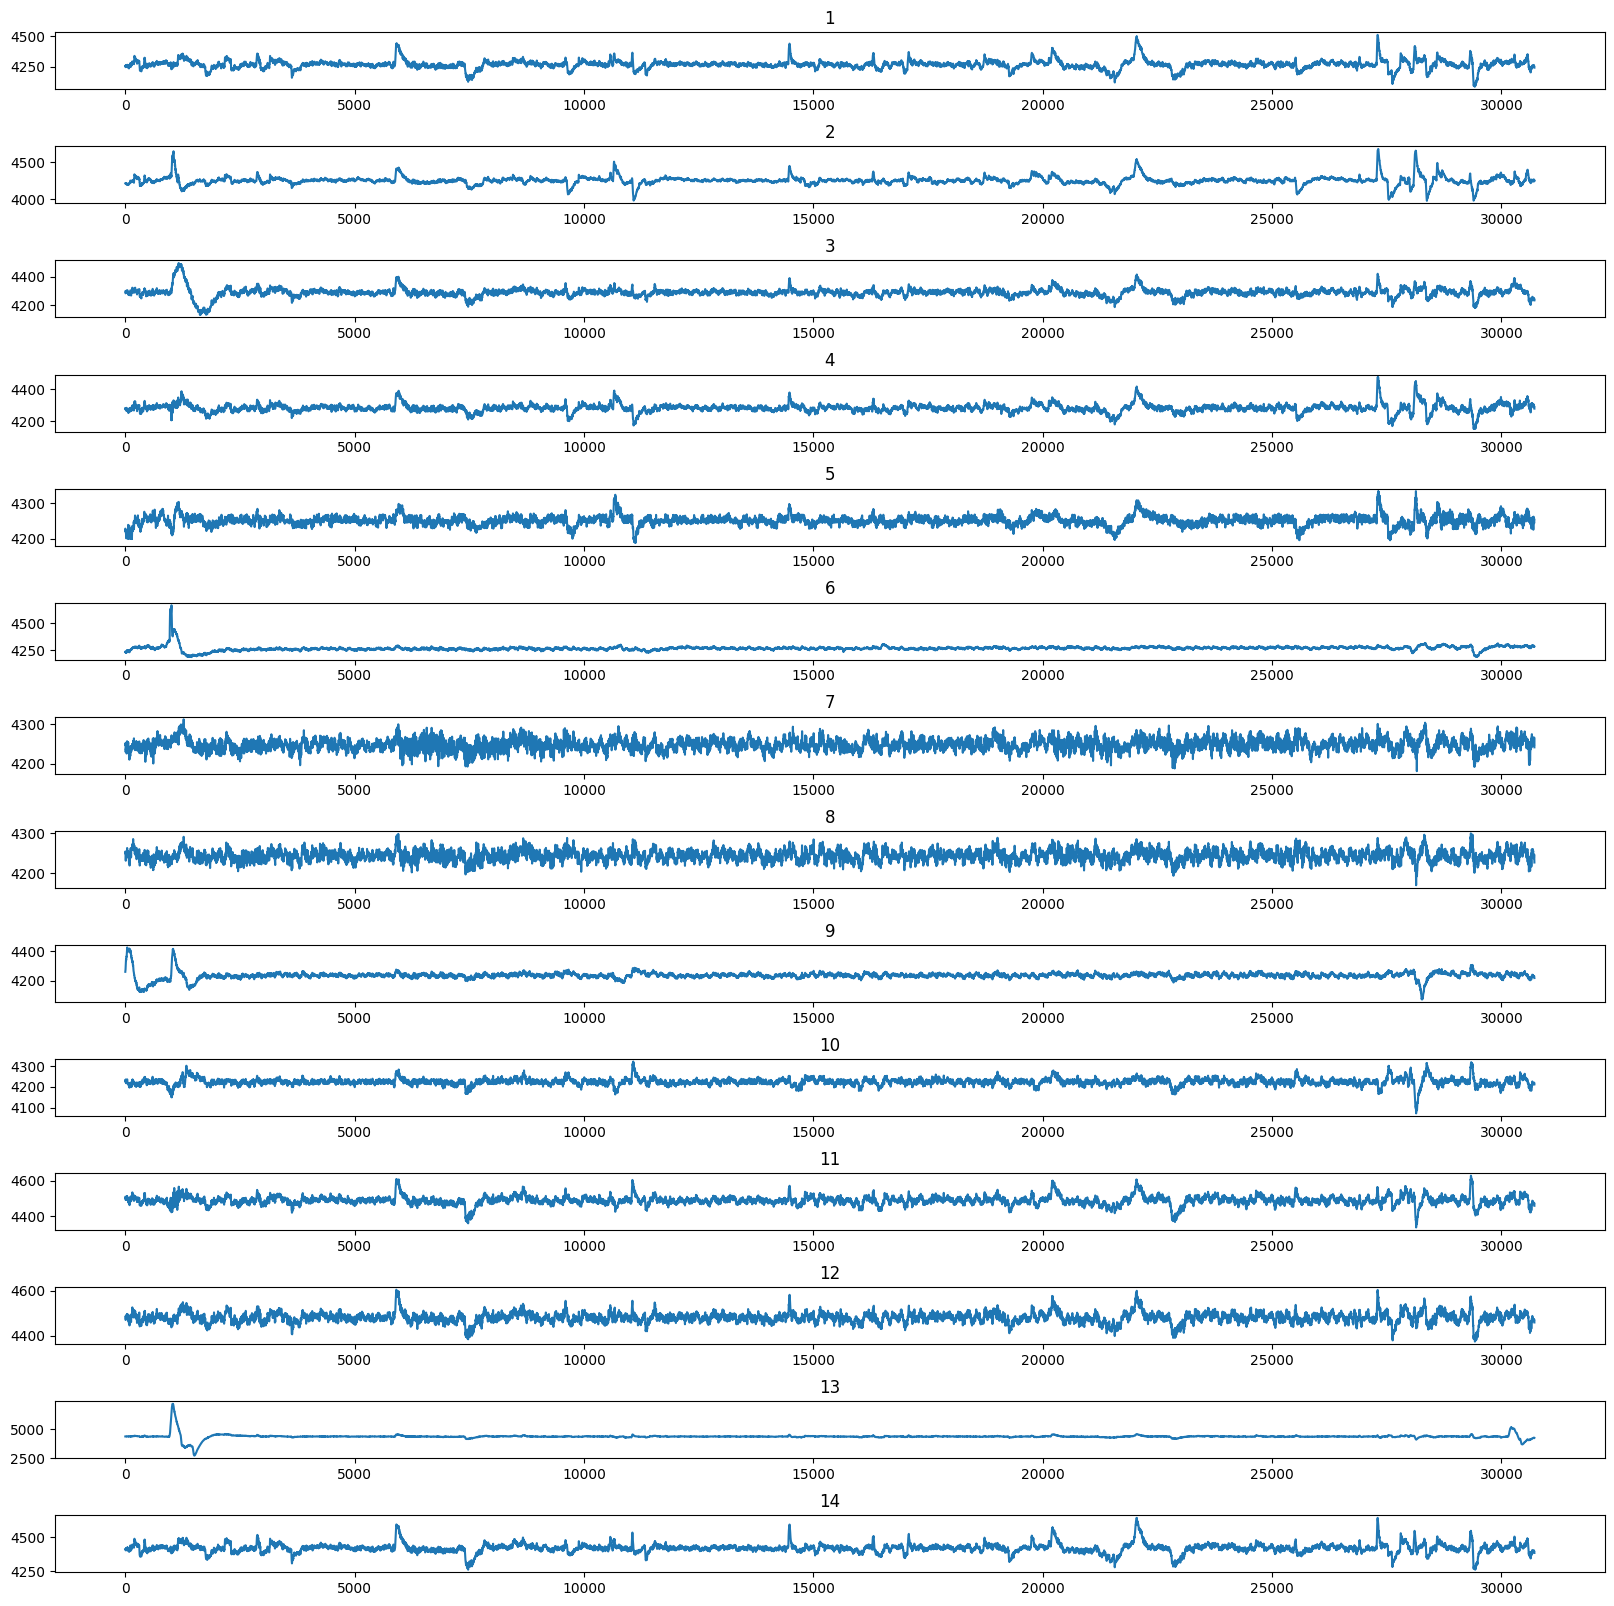

In [7]:
# plot all 14 signals using for loop and subplot of matplotlib
plt.figure(figsize=(20,20))
for i in range(14):
    plt.subplot(14,1,i+1)
    plt.plot(brown_df_signals[i+1])
    plt.title(i+1)

# horizontal space
plt.subplots_adjust(hspace=1)

In [8]:
# remove first 10 seconds of data and last 10 seconds of data
fs = 256
brown_df_signals = brown_df_signals[fs*10:-fs*10]

# print the length of dataframe row
print(f"Length of dataframe row: {len(brown_df_signals)}")

Length of dataframe row: 25600


In [9]:
# transpose the dataframe
brown_df_signals = brown_df_signals.T

In [10]:
print(f"Shape of dataframe: {brown_df_signals.shape}")

Shape of dataframe: (14, 25600)


In [11]:
info = mne.create_info(brown_df_signals.shape[0], fs, ch_types='eeg')
raw = mne.io.RawArray(brown_df_signals, info)

Creating RawArray with float64 data, n_channels=14, n_times=25600
    Range : 0 ... 25599 =      0.000 ...    99.996 secs
Ready.


# Kode Beneran

In [12]:
def read_csv_and_create_raw(csv_file, sfreq=256):
    # Read CSV file
    data = pd.read_csv(csv_file, header=1)

    data = data[['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']]

    data.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

    fs = 256
    data = data[fs*10:-fs*10]

    data = data.T

    # Create an Info object with the simulation parameters
    info = mne.create_info(data.shape[0], sfreq, ch_types='eeg')

    # Create a Raw object with the data
    raw = mne.io.RawArray(data, info)

    return raw

In [13]:
csv_files = {'brown': 'Brown.csv', 'White': 'White.csv', 'Pink': 'Pink.csv'}
raws = {name: read_csv_and_create_raw(file) for name, file in csv_files.items()}

Creating RawArray with float64 data, n_channels=14, n_times=25600
    Range : 0 ... 25599 =      0.000 ...    99.996 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=25600
    Range : 0 ... 25599 =      0.000 ...    99.996 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=25600
    Range : 0 ... 25599 =      0.000 ...    99.996 secs
Ready.


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 423 samples (1.652 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
-

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average PSD baseline: 696.9563718567202 | Avg PSD stimuli: 650.8639913001741
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 423 samples (1.652 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average PSD baseline: 723.5555895868537 | Avg PSD stimuli: 604.6556606445971
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 423 samples (1.652 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average PSD baseline: 758.9193815133343 | Avg PSD stimuli: 490.9122086200601
Relative Alpha Power:
Brown noise:
  Baseline: 0.0233
  Stimuli: 0.0147
White noise:
  Baseline: 0.0182
  Stimuli: 0.0223
Pink noise:
  Baseline: 0.0096
  Stimuli: 0.0168


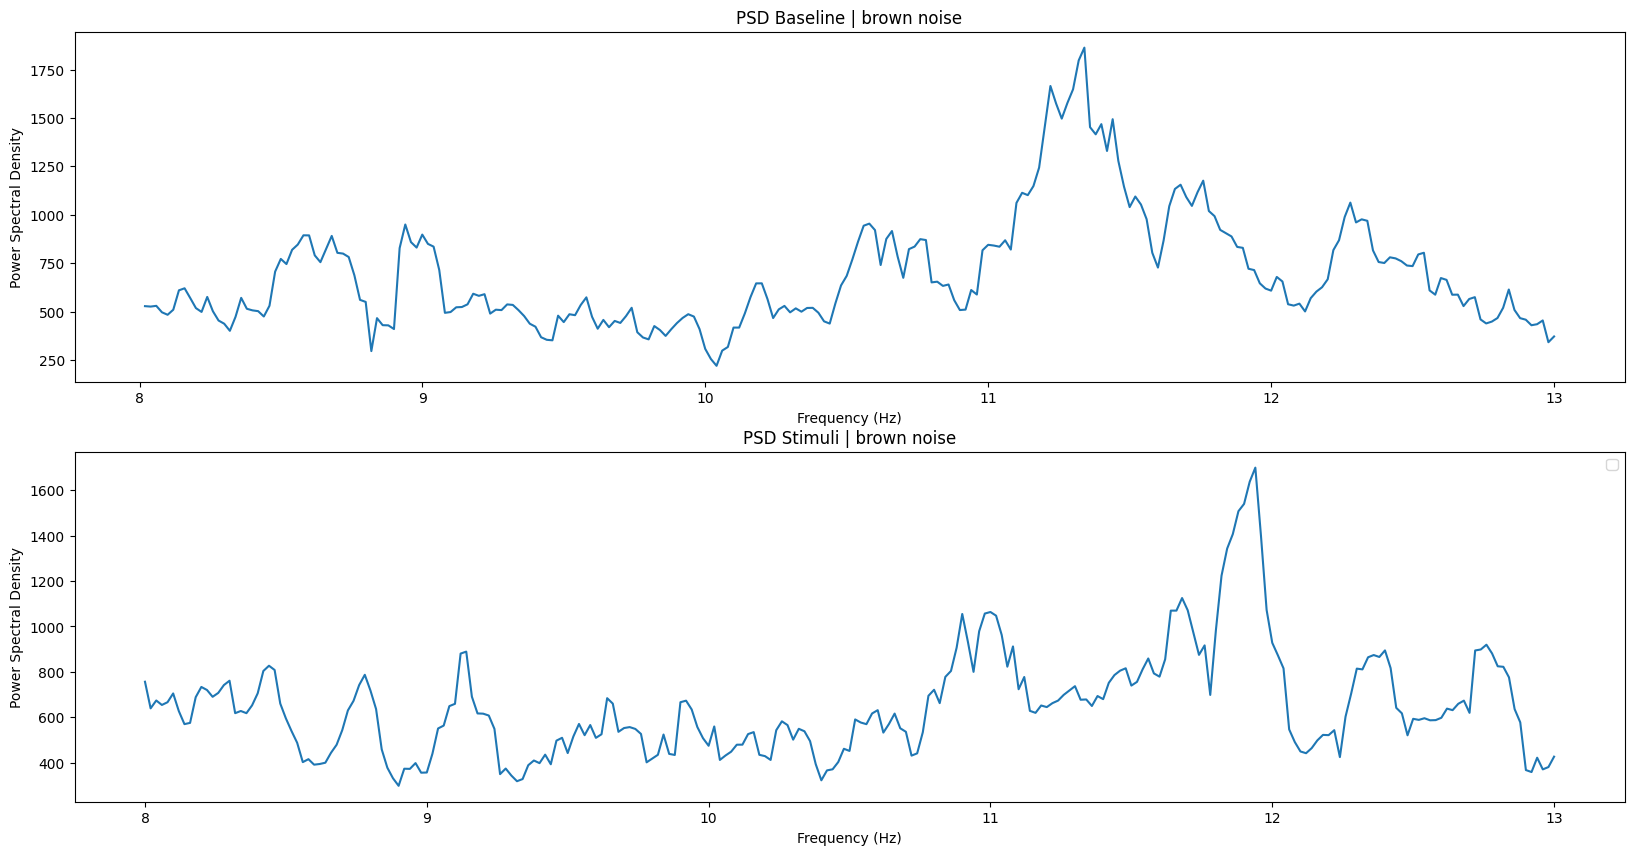

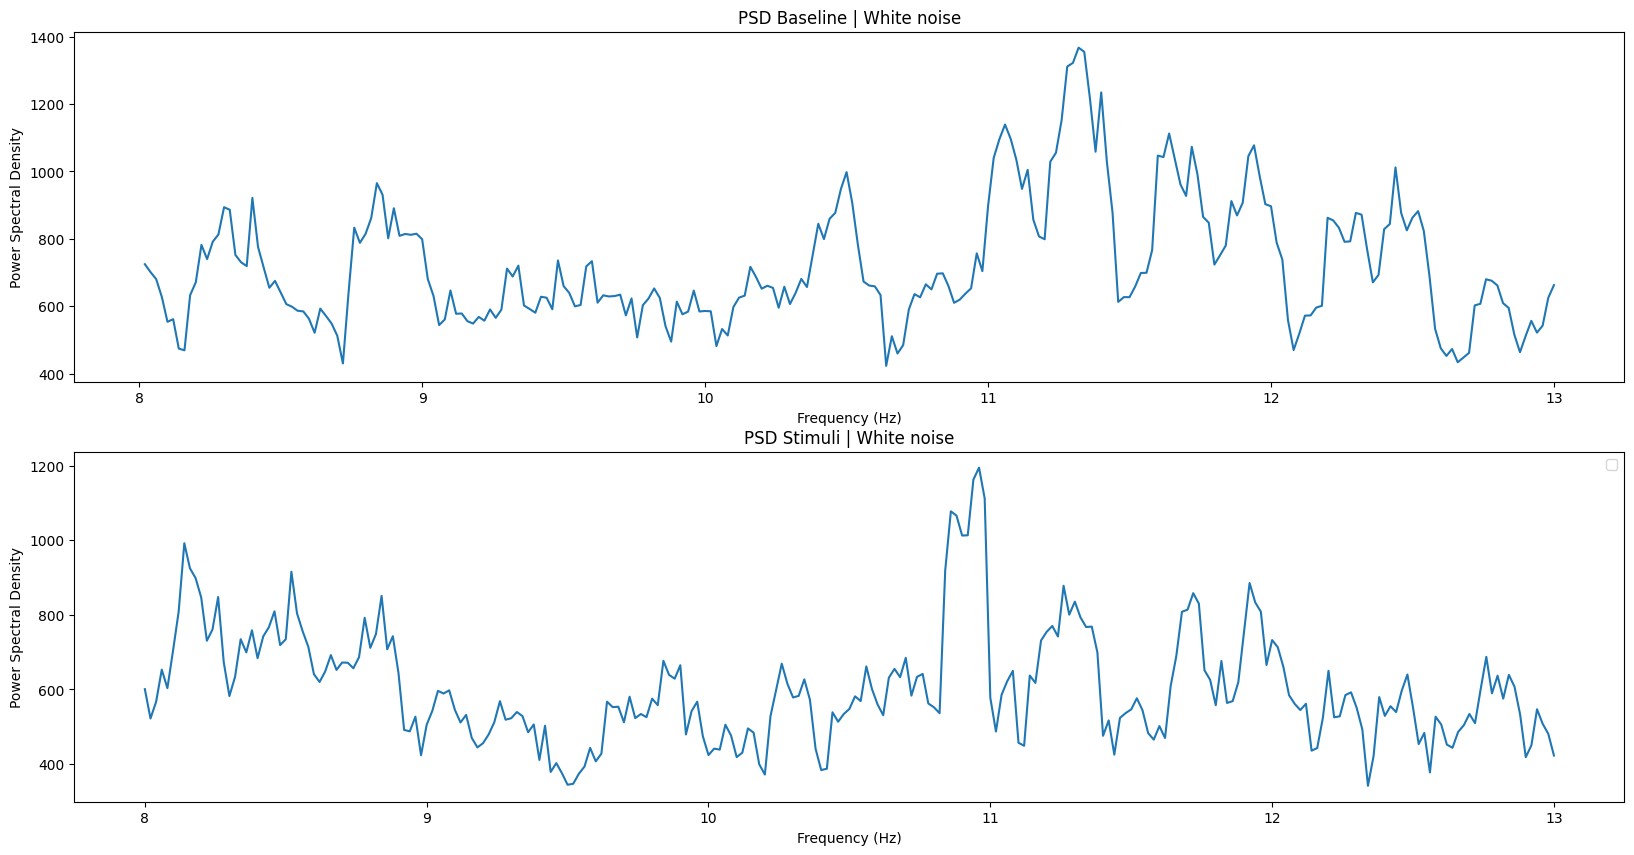

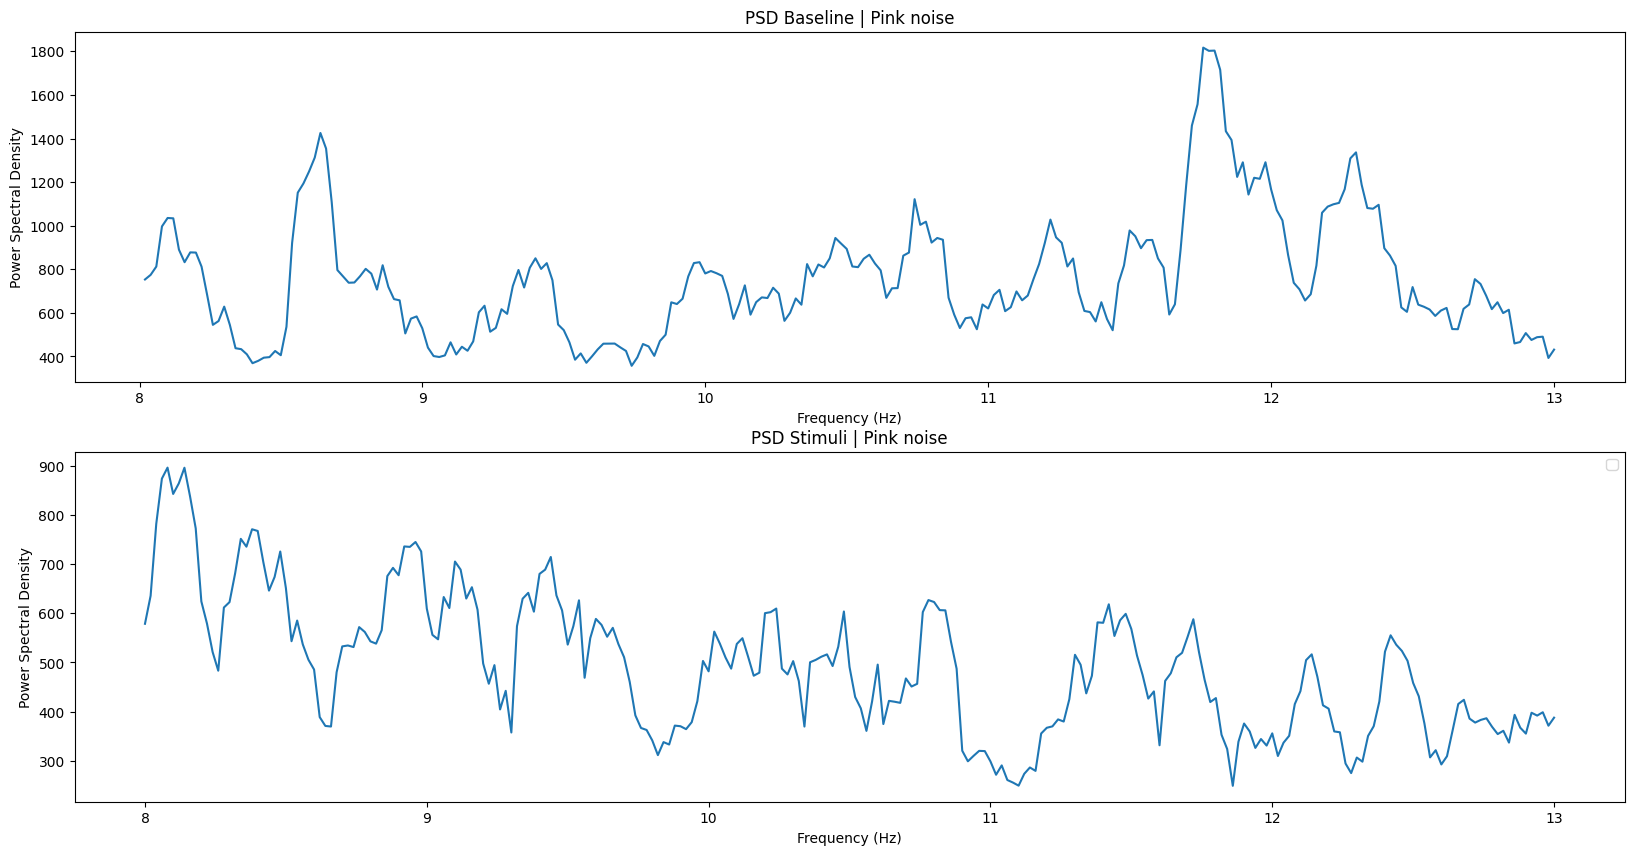

In [14]:
# Calculate the maximum possible tmax_stimuli value based on the length of the data
max_time = raws[next(iter(raws))].times[-1]

# Set the baseline and stimuli periods
tmin_baseline, tmax_baseline = 0, 50
tmin_stimuli, tmax_stimuli = 50, max_time

# Define the frequency bands
freq_bands = {'delta': (0.5, 4),
              'theta': (4, 8),
              'alpha': (8, 13),
              'beta': (13, 30),
              'gamma': (30, 50)}

# Calculate the relative power of the alpha band for each condition
relative_alpha_powers = {}

for name, raw in raws.items():
    # Extract the baseline and stimuli periods
    raw_baseline = raw.copy().crop(tmin_baseline, tmax_baseline)
    raw_stimuli = raw.copy().crop(tmin_stimuli, tmax_stimuli)

    # Calculate the power spectral density for the baseline and stimuli periods without filtering
    psd_baseline_total, freqs = mne.time_frequency.psd_array_multitaper(raw_baseline.get_data(), sfreq=raw_baseline.info['sfreq'])
    psd_stimuli_total, _ = mne.time_frequency.psd_array_multitaper(raw_stimuli.get_data(), sfreq=raw_stimuli.info['sfreq'])

    # Filter the data for the alpha band
    raw_baseline.filter(freq_bands['alpha'][0], freq_bands['alpha'][1], fir_design='firwin')
    raw_stimuli.filter(freq_bands['alpha'][0], freq_bands['alpha'][1], fir_design='firwin')

    # Calculate the power spectral density for the baseline and stimuli periods in the alpha band
    psd_baseline_alpha, freqs = mne.time_frequency.psd_array_multitaper(raw_baseline.get_data(), sfreq=raw_baseline.info['sfreq'], fmin=freq_bands['alpha'][0], fmax=freq_bands['alpha'][1])
    psd_stimuli_alpha, freqs_stim = mne.time_frequency.psd_array_multitaper(raw_stimuli.get_data(), sfreq=raw_stimuli.info['sfreq'], fmin=freq_bands['alpha'][0], fmax=freq_bands['alpha'][1])

    print(f"Length of PSD baseline: {len(psd_baseline_alpha)}")
    
    # plot the power spectral density for the baseline and stimuli periods in the alpha band in subplot
    plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(freqs, psd_baseline_alpha.mean(0))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.title(f"PSD Baseline | {name} noise")
    plt.subplot(212)
    plt.plot(freqs_stim, psd_stimuli_alpha.mean(0))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.title(f"PSD Stimuli | {name} noise")
    plt.legend()

    # Calculate the total power of the baseline and stimuli periods (NON FILTER)
    total_power_baseline = np.sum(psd_baseline_total)
    total_power_stimuli = np.sum(psd_stimuli_total)

    # Calculate the relative power of the alpha band for the baseline and stimuli periods
    # relative_power = sum(filtered_psd) / sum(non_filtered_psd)
    # Contoh, relative_power_alpha = sum(psd_alpha) / sum(non_filtered_psd)
    # Contoh, relative_power_beta = sum(psd_beta) / sum(non_filtered_psd

    
    
    # get the average of the alpha PSD
    avg_baseline_alpha = np.mean(psd_baseline_alpha)
    avg_stimuli_alpha = np.mean(psd_stimuli_alpha)

    print(f"Average PSD baseline: {avg_baseline_alpha} | Avg PSD stimuli: {avg_stimuli_alpha}")


    relative_alpha_power_baseline = np.sum(psd_baseline_alpha) / total_power_baseline
    relative_alpha_power_stimuli = np.sum(psd_stimuli_alpha) / total_power_stimuli

    relative_alpha_powers[name] = (relative_alpha_power_baseline, relative_alpha_power_stimuli)


# Print the results
print("Relative Alpha Power:")
for name, powers in relative_alpha_powers.items():
    print(f"{name.capitalize()} noise:")
    print(f"  Baseline: {powers[0]:.4f}")
    print(f"  Stimuli: {powers[1]:.4f}")

In [15]:
# Calculate the maximum possible tmax_stimuli value based on the length of the data
max_time = raws[next(iter(raws))].times[-1]

# Set the baseline and stimuli periods
tmin_baseline, tmax_baseline = 0, 50
tmin_stimuli, tmax_stimuli = 50, max_time

# Define the frequency bands
freq_bands = {'delta': (0.5, 4),
              'theta': (4, 8),
              'alpha': (8, 13),
              'beta': (13, 30),
              'gamma': (30, 50)}

# Calculate the relative power of the alpha band for each condition
relative_alpha_powers = {}

for name, raw in raws.items():
    # Extract the baseline and stimuli periods
    raw_baseline = raw.copy().crop(tmin_baseline, tmax_baseline)
    raw_stimuli = raw.copy().crop(tmin_stimuli, tmax_stimuli)

    # Calculate the power spectral density for the baseline and stimuli periods without filtering
    psd_baseline_total, freqs = mne.time_frequency.psd_array_multitaper(raw_baseline.get_data(), sfreq=raw_baseline.info['sfreq'])
    psd_stimuli_total, _ = mne.time_frequency.psd_array_multitaper(raw_stimuli.get_data(), sfreq=raw_stimuli.info['sfreq'])

    # Filter the data for the alpha band
    raw_baseline.filter(freq_bands['beta'][0], freq_bands['beta'][1], fir_design='firwin')
    raw_stimuli.filter(freq_bands['beta'][0], freq_bands['beta'][1], fir_design='firwin')

    # Calculate the power spectral density for the baseline and stimuli periods in the alpha band
    psd_baseline_alpha, freqs = mne.time_frequency.psd_array_multitaper(raw_baseline.get_data(), sfreq=raw_baseline.info['sfreq'], fmin=freq_bands['alpha'][0], fmax=freq_bands['alpha'][1])
    psd_stimuli_alpha, _ = mne.time_frequency.psd_array_multitaper(raw_stimuli.get_data(), sfreq=raw_stimuli.info['sfreq'], fmin=freq_bands['alpha'][0], fmax=freq_bands['alpha'][1])

    # Calculate the total power of the baseline and stimuli periods
    total_power_baseline = np.sum(psd_baseline_total)
    total_power_stimuli = np.sum(psd_stimuli_total)

    # Calculate the relative power of the alpha band for the baseline and stimuli periods
    relative_alpha_power_baseline = np.sum(psd_baseline_alpha) / total_power_baseline
    relative_alpha_power_stimuli = np.sum(psd_stimuli_alpha) / total_power_stimuli

    relative_alpha_powers[name] = (relative_alpha_power_baseline, relative_alpha_power_stimuli)


# Print the results
print("Relative Alpha Power:")
for name, powers in relative_alpha_powers.items():
    print(f"{name.capitalize()} noise:")
    print(f"  Baseline: {powers[0]:.4f}")
    print(f"  Stimuli: {powers[1]:.4f}")

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuati